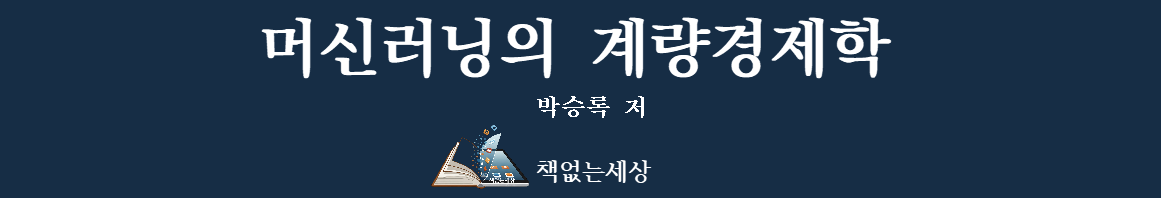

# Chapter 5. 더미변수(Dummy Variable)의 활용

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:\JupyterWorkingDirectory\MyStock")
os.getcwd()

'E:\\JupyterWorkingDirectory\\MyStock'

In [21]:
exec(open('E:/JupyterWDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""

In [3]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

wage1 = woo.dataWoo('wage1')
display(wage1)
wage1.describe().T

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


,count,mean,std,min,25%,50%,75%,max
wage,526.0,5.896103,3.693086,0.530000,3.330000,4.650000,6.880000,24.980000
educ,526.0,12.562738,2.769022,0.000000,12.000000,12.000000,14.000000,18.000000
exper,526.0,17.017110,13.572160,1.000000,5.000000,13.500000,26.000000,51.000000
tenure,526.0,5.104563,7.224462,0.000000,0.000000,2.000000,7.000000,44.000000
nonwhite,526.0,0.102662,0.303805,0.000000,0.000000,0.000000,0.000000,1.000000
female,526.0,0.479087,0.500038,0.000000,0.000000,0.000000,1.000000,1.000000
married,526.0,0.608365,0.488580,0.000000,0.000000,1.000000,1.000000,1.000000
numdep,526.0,1.043726,1.261891,0.000000,0.000000,1.000000,2.000000,6.000000
smsa,526.0,0.722433,0.448225,0.000000,0.000000,1.000000,1.000000,1.000000
northcen,526.0,0.250951,0.433973,0.000000,0.000000,0.000000,0.750000,1.000000


In [4]:
reg = smf.ols(formula='wage ~ female + educ + exper + tenure', data=wage1)
results = reg.fit()
display(results.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           7.30e-50
Time:                        19:27:18   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5679      0.725     -2.164      0.031      -2.991      -0.145
female        -1.8109      0.265     -6.838      0.000      -2.331      -1.291
educ           0.5715      0.049     11.584      0.000       0.475       0.668
exper          0.0254      0.012      2.195      0.029       0.003       0.048
tenure         0.1410      0.021      6.663      0.000       0.099       0.183
==============================================================================
Omnibus:                      185.864   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.580
Skew:                           1.589   Prob(JB):                    4.11e-156
Kurtosis:                       7.749   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### boolean dummy variable

In [7]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

wage1 = woo.dataWoo('wage1')

# boolean variable:
wage1['dum_female'] = (wage1['female'] == 1)
display(wage1)

reg = smf.ols(formula='wage ~ dum_female + educ + exper + tenure', data=wage1)
results = reg.fit()
display(results.summary())


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,dum_female
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,True
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,True
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,False
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,False
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,1,1,0,0,2.708050,196,4,True
522,2.27,10,2,0,0,1,0,3,0,0,...,1,0,0,1,0,0,0.819780,4,0,True
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,1,0,0,1.541159,169,324,False
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2.447551,25,1,False


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     74.40
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           7.30e-50
Time:                        19:28:31   Log-Likelihood:                -1314.2
No. Observations:                 526   AIC:                             2638.
Df Residuals:                     521   BIC:                             2660.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5679      0.725     -2.164      0.031      -2.991      -0.145
dum_female[T.True]    -1.8109      0.265     -6.838      0.000      -2.331      -1.291
educ                   0.5715      0.049     11.584      0.000       0.475       0.668
exper                  0.0254      0.012      2.195      0.029       0.003       0.048
tenure                 0.1410      0.021      6.663      0.000       0.099       0.183
==============================================================================
Omnibus:                      185.864   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.580
Skew:                           1.589   Prob(JB):                    4.11e-156
Kurtosis:                       7.749   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

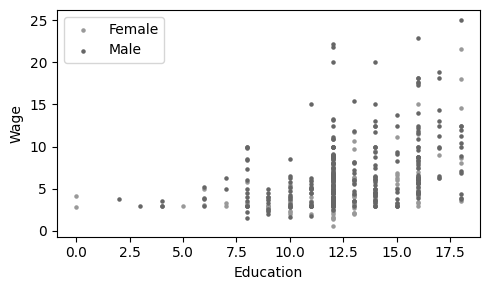

In [6]:
# Scatter plot with two categories. Dataset: utown
plt.figure(figsize = (5, 3))
plt.scatter('educ', 'wage', label = 'Female', color = '0.6', s=5, data = wage1[wage1['female'] == 1])
plt.scatter('educ', 'wage', label = 'Male',   color = '0.4', s=5, data = wage1[wage1['female'] == 0])
plt.xlabel('Education')
plt.ylabel('Wage')
plt.legend()
plt.tight_layout()

#### 1) 판다스의 get_dummies() 함수 사용

In [8]:
# 더미변수 만들기
Dummy_female = pd.get_dummies(wage1, columns=['female'], drop_first=True)
print(Dummy_female)

      wage  educ  exper  tenure  nonwhite  married  numdep  smsa  northcen  \
0     3.10    11      2       0         0        0       2     1         0   
1     3.24    12     22       2         0        1       3     1         0   
2     3.00    11      2       0         0        0       2     0         0   
3     6.00     8     44      28         0        1       0     1         0   
4     5.30    12      7       2         0        1       1     0         0   
..     ...   ...    ...     ...       ...      ...     ...   ...       ...   
521  15.00    16     14       2         0        1       2     0         0   
522   2.27    10      2       0         0        0       3     0         0   
523   4.67    15     13      18         0        1       3     0         0   
524  11.56    16      5       1         0        1       0     0         0   
525   3.50    14      5       4         1        0       2     0         0   

     south  ...  services  profserv  profocc  clerocc  servocc 

#### 2) sklearn의 OneHotEncoder 사용

In [22]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = np.array(['red', 'green', 'blue', 'green', 'red']).reshape(-1, 1)

# 원-핫 인코더(OneHotEncoder instance)
encoder = OneHotEncoder(sparse_output=False)

# 원-핫 변수 생성(Fit and transform the data)
encoded_data = encoder.fit_transform(data)

# Print the encoded data
print(encoded_data)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 3) 카테고리 함수 C() 사용

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

CPS1985 = pd.read_csv('Data/cps1985.csv')

# 카테고리 변수별(성별) 빈도수 
freq_gender = pd.crosstab(CPS1985['gender'], columns='count')
print(f'freq_gender: \n{freq_gender}\n')

# 카테고리 변수별(직업별) 빈도수 
freq_occupation = pd.crosstab(CPS1985['occupation'], columns='count')
print(f'freq_occupation: \n{freq_occupation}\n')

# 카테고리변수를 직접 회귀식 Formula의 독립변수에 이용하는 방법: C()함수 이용
reg = smf.ols(formula='np.log(wage) ~ education +'
                      'experience + C(gender) + C(occupation)', data=CPS1985)
results = reg.fit()

display(results.summary())


freq_gender: 
col_0   count
gender       
female    245
male      289

freq_occupation: 
col_0       count
occupation       
management     55
office         97
sales          38
services       83
technical     105
worker        156



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     30.57
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.55e-39
Time:                        19:32:31   Log-Likelihood:                -313.80
No. Observations:                 534   AIC:                             645.6
Df Residuals:                     525   BIC:                             684.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.9050      0.172      5.272      0.000       0.568       1.242
C(gender)[T.male]              0.2238      0.042      5.298      0.000       0.141       0.307
C(occupation)[T.office]       -0.2073      0.078     -2.670      0.008      -0.360      -0.055
C(occupation)[T.sales]        -0.3601      0.094     -3.846      0.000      -0.544      -0.176
C(occupation)[T.services]     -0.3626      0.082     -4.430      0.000      -0.523      -0.202
C(occupation)[T.technical]    -0.0101      0.074     -0.136      0.892      -0.155       0.135
C(occupation)[T.worker]       -0.1525      0.076     -1.998      0.046      -0.303      -0.003
education                      0.0759      0.010      7.545      0.000       0.056       0.096
experience                     0.0119      0.002      7.089      0.000       0.009       0.015
==============================================================================
Omnibus:                       22.197   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.572
Skew:                          -0.187   Prob(JB):                     2.84e-11
Kurtosis:                       4.429   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# # 카테고리변수에서 기준변수(reference)지정 방법: treatment()사용
reg_newref = smf.ols(formula='np.log(wage) ~ education + experience + '
                             'C(gender, Treatment("male")) + '
                             'C(occupation, Treatment("technical"))', data=CPS1985)
results_newref = reg_newref.fit()
#print(results_newref.summary())
display(results_newref.summary())

# print results:
table_newref = pd.DataFrame({'b': round(results_newref.params, 4),
                             'se': round(results_newref.bse, 4),
                             't': round(results_newref.tvalues, 4),
                             'pval': round(results_newref.pvalues, 4)})
#print(f'table_newref: \n{table_newref}\n')
display(table_newref)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     30.57
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           2.55e-39
Time:                        15:14:37   Log-Likelihood:                -313.80
No. Observations:                 534   AIC:                             645.6
Df Residuals:                     525   BIC:                             684.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               1.1187      0.176      6.339      0.000       0.772       1.465
C(gender, Treatment("male"))[T.female]                 -0.2238      0.042     -5.298      0.000      -0.307      -0.141
C(occupation, Treatment("technical"))[T.management]     0.0101      0.074      0.136      0.892      -0.135       0.155
C(occupation, Treatment("technical"))[T.office]        -0.1972      0.068     -2.908      0.004      -0.330      -0.064
C(occupation, Treatment("technical"))[T.sales]         -0.3500      0.086     -4.054      0.000      -0.520      -0.180
C(occupation, Treatment("technical"))[T.services]      -0.3525      0.075     -4.703      0.000      -0.500      -0.205
C(occupation, Treatment("technical"))[T.worker]        -0.1425      0.070     -2.022      0.044      -0.281      -0.004
education                                               0.0759      0.010      7.545      0.000       0.056       0.096
experience                                              0.0119      0.002      7.089      0.000       0.009       0.015
==============================================================================
Omnibus:                       22.197   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.572
Skew:                          -0.187   Prob(JB):                     2.84e-11
Kurtosis:                       4.429   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,b,se,t,pval
Intercept,1.1187,0.1765,6.3393,0.0000
"C(gender, Treatment(""male""))[T.female]",-0.2238,0.0423,-5.2979,0.0000
"C(occupation, Treatment(""technical""))[T.management]",0.0101,0.0740,0.1363,0.8916
"C(occupation, Treatment(""technical""))[T.office]",-0.1972,0.0678,-2.9082,0.0038
"C(occupation, Treatment(""technical""))[T.sales]",-0.3500,0.0863,-4.0541,0.0001
"C(occupation, Treatment(""technical""))[T.services]",-0.3525,0.0750,-4.7030,0.0000
"C(occupation, Treatment(""technical""))[T.worker]",-0.1425,0.0705,-2.0218,0.0437
education,0.0759,0.0101,7.5449,0.0000
experience,0.0119,0.0017,7.0895,0.0000


#### 4) 연속형 변수로부터 더미 변수

In [12]:
# 연속형 변수를 카테고리 변수로 나누어 회귀분석
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

lawsch85 = woo.dataWoo('lawsch85')

lawsch85.describe()

,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,...,east,west,lsalary,studfac,top10,r11_25,r26_40,r41_60,llibvol,lcost
count,156.000000,148.000000,150.000000,150.000000,149.000000,155.000000,152.000000,111.000000,153.000000,156.000000,...,156.000000,156.00000,148.000000,150.000000,156.000000,156.000000,156.000000,156.000000,155.000000,150.000000
mean,83.750000,38946.716216,12736.240000,158.293333,3.302752,347.070968,70.730263,85.819820,241.830065,0.205128,...,0.307692,0.24359,10.528776,3.706660,0.064103,0.102564,0.083333,0.115385,5.751981,9.392434
std,50.064169,12188.840435,4012.667528,4.701202,0.199776,188.242214,39.260376,40.891697,113.072275,0.405096,...,0.463025,0.43063,0.276720,1.311862,0.245724,0.304366,0.277276,0.320514,0.416548,0.368915
min,1.000000,24900.000000,2623.000000,140.000000,2.730000,124.000000,17.000000,3.000000,70.000000,0.000000,...,0.000000,0.00000,10.122623,1.010000,0.000000,0.000000,0.000000,0.000000,4.820282,7.872074
25%,40.750000,29950.000000,9663.750000,155.000000,3.200000,235.000000,45.000000,63.500000,163.000000,0.000000,...,0.000000,0.00000,10.307280,2.862103,0.000000,0.000000,0.000000,0.000000,5.459577,9.176127
50%,83.500000,34725.000000,12898.500000,158.000000,3.300000,302.000000,58.000000,85.000000,225.000000,0.000000,...,0.000000,0.00000,10.455215,3.555701,0.000000,0.000000,0.000000,0.000000,5.710427,9.464864
75%,125.500000,41350.000000,16129.000000,161.000000,3.410000,400.000000,86.250000,112.500000,284.000000,0.000000,...,1.000000,0.00000,10.629826,4.305159,0.000000,0.000000,0.000000,0.000000,5.991465,9.688369
max,175.000000,78325.000000,20518.000000,171.000000,3.820000,1745.000000,245.000000,206.000000,679.000000,1.000000,...,1.000000,1.00000,11.268622,9.342857,1.000000,1.000000,1.000000,1.000000,7.464510,9.929058


In [13]:
# 연속형 변수를 나눌 구간 설정
cut_points = [1, 30, 80, 120, 175]

# 카테고리변수 생성
lawsch85['rank_c'] = pd.cut(lawsch85['rank'], bins=cut_points,
                        labels=['(1_30]', '(30_80]', '(80_120]', '(120_175]'])

# 카테고리별 빈도수
freq = pd.crosstab(lawsch85['rank_c'], columns='count')
display(freq)

# 회귀분석
reg = smf.ols(formula='np.log(salary) ~ C(rank_c, Treatment("(120_175]")) +'
                      'LSAT + GPA + np.log(libvol) + np.log(cost)',
                      data=lawsch85)
results = reg.fit()
display(results.summary())

# 분산분석표(ANOVA table)
table_anova = sm.stats.anova_lm(results, typ=2)
display(table_anova)

col_0,count
rank_c,
(1_30],30
(30_80],44
(80_120],37
(120_175],44


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     140.0
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.51e-56
Time:                        19:34:22   Log-Likelihood:                 130.04
No. Observations:                 135   AIC:                            -244.1
Df Residuals:                     127   BIC:                            -220.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         8.3686      0.425     19.691      0.000       7.528       9.210
C(rank_c, Treatment("(120_175]"))[T.(1_30]]       0.5470      0.043     12.682      0.000       0.462       0.632
C(rank_c, Treatment("(120_175]"))[T.(30_80]]      0.2064      0.027      7.661      0.000       0.153       0.260
C(rank_c, Treatment("(120_175]"))[T.(80_120]]     0.0765      0.025      3.056      0.003       0.027       0.126
LSAT                                              0.0056      0.003      1.638      0.104      -0.001       0.012
GPA                                               0.1089      0.079      1.380      0.170      -0.047       0.265
np.log(libvol)                                    0.0785      0.030      2.632      0.010       0.019       0.137
np.log(cost)                                      0.0301      0.027      1.102      0.272      -0.024       0.084
==============================================================================
Omnibus:                       16.968   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.843
Skew:                           0.640   Prob(JB):                     2.44e-06
Kurtosis:                       4.719   Cond. No.                     8.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,sum_sq,df,F,PR(>F)
"C(rank_c, Treatment(""(120_175]""))",1.602426,3.0,58.918035,6.202913e-24
LSAT,0.024331,1.0,2.683785,1.038498e-01
GPA,0.017260,1.0,1.903794,1.700787e-01
np.log(libvol),0.062790,1.0,6.926002,9.547872e-03
np.log(cost),0.011012,1.0,1.214693,2.724889e-01
Residual,1.151363,127.0,NaN,NaN


In [14]:
# 카테고리 변수 가운데 일부에 대한 회귀분석(1)
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

gpa3 = woo.dataWoo('gpa3')

# model with full interactions with female dummy (only for spring data):
reg = smf.ols(formula='cumgpa ~ female * (sat + hsperc + tothrs)',
              data=gpa3, subset=(gpa3['spring'] == 1))
results = reg.fit()
display(results.summary())

# 관심변수의 효과에 대한 F검정
hypotheses = ['female = 0', 'female:sat = 0',
              'female:hsperc = 0', 'female:tothrs = 0']
ftest = results.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cumgpa   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     34.95
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           4.66e-37
Time:                        19:34:33   Log-Likelihood:                -237.26
No. Observations:                 366   AIC:                             490.5
Df Residuals:                     358   BIC:                             521.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4808      0.207      7.142      0.000       1.073       1.889
female           -0.3535      0.411     -0.861      0.390      -1.161       0.454
sat               0.0011      0.000      5.807      0.000       0.001       0.001
hsperc           -0.0085      0.001     -6.167      0.000      -0.011      -0.006
tothrs            0.0023      0.001      2.718      0.007       0.001       0.004
female:sat        0.0008      0.000      1.949      0.052   -6.88e-06       0.002
female:hsperc    -0.0005      0.003     -0.174      0.862      -0.007       0.006
female:tothrs    -0.0001      0.002     -0.071      0.943      -0.003       0.003
==============================================================================
Omnibus:                        6.858   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                9.054
Skew:                          -0.146   Prob(JB):                       0.0108
Kurtosis:                       3.713   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

fstat: 8.179111637046036

fpval: 2.5446371918233614e-06



In [15]:
# 카테고리 변수 가운데 일부에 대한 회귀분석(2)
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

gpa3 = woo.dataWoo('gpa3')

# males, spring data에 대한 회귀분석
reg_m = smf.ols(formula='cumgpa ~ sat + hsperc + tothrs',
                data=gpa3,
                subset=(gpa3['spring'] == 1) & (gpa3['female'] == 0))
results_m = reg_m.fit()
display(results.summary())

# females, spring data에 대한 회귀분석
reg_f = smf.ols(formula='cumgpa ~ sat + hsperc + tothrs',
                data=gpa3,
                subset=(gpa3['spring'] == 1) & (gpa3['female'] == 1))
results_f = reg_f.fit()
display(results_f.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cumgpa   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     34.95
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           4.66e-37
Time:                        19:34:40   Log-Likelihood:                -237.26
No. Observations:                 366   AIC:                             490.5
Df Residuals:                     358   BIC:                             521.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4808      0.207      7.142      0.000       1.073       1.889
female           -0.3535      0.411     -0.861      0.390      -1.161       0.454
sat               0.0011      0.000      5.807      0.000       0.001       0.001
hsperc           -0.0085      0.001     -6.167      0.000      -0.011      -0.006
tothrs            0.0023      0.001      2.718      0.007       0.001       0.004
female:sat        0.0008      0.000      1.949      0.052   -6.88e-06       0.002
female:hsperc    -0.0005      0.003     -0.174      0.862      -0.007       0.006
female:tothrs    -0.0001      0.002     -0.071      0.943      -0.003       0.003
==============================================================================
Omnibus:                        6.858   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                9.054
Skew:                          -0.146   Prob(JB):                       0.0108
Kurtosis:                       3.713   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     19.23
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.25e-09
Time:                        19:34:40   Log-Likelihood:                -59.118
No. Observations:                  90   AIC:                             126.2
Df Residuals:                      86   BIC:                             136.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1273      0.362      3.118      0.002       0.408       1.846
sat            0.0018      0.000      5.195      0.000       0.001       0.002
hsperc        -0.0090      0.003     -3.096      0.003      -0.015      -0.003
tothrs         0.0022      0.001      1.582      0.117      -0.001       0.005
==============================================================================
Omnibus:                        1.816   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.242
Skew:                          -0.131   Prob(JB):                        0.537
Kurtosis:                       3.513   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""